<a href="https://colab.research.google.com/github/SnehaKotte/ADM-/blob/main/ADM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [52]:
fake_df = pd.read_csv("../content/Fake.csv")
true_df = pd.read_csv("../content/True.csv")

In [53]:
print(f"Fake news dataset has: {fake_df.shape[0]} rows")
print(f"Fake news dataset has: {fake_df.shape[1]} columns")

Fake news dataset has: 23481 rows
Fake news dataset has: 4 columns


In [10]:
fake_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [54]:
true_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [55]:
fake_df['Fake'] = 1
true_df['Fake'] = 0
df = pd.concat([fake_df, true_df])

In [56]:
 df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

<Axes: xlabel='Fake', ylabel='count'>

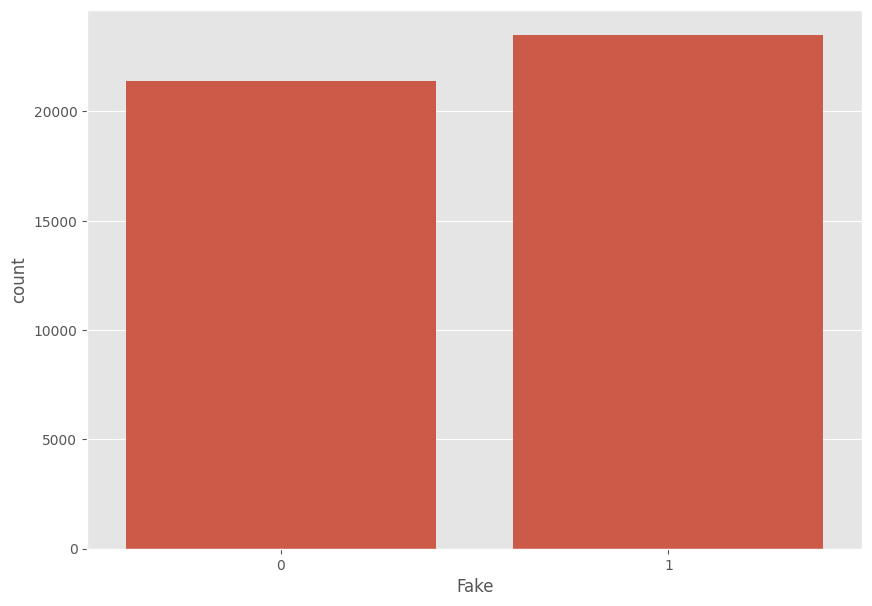

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Fake')

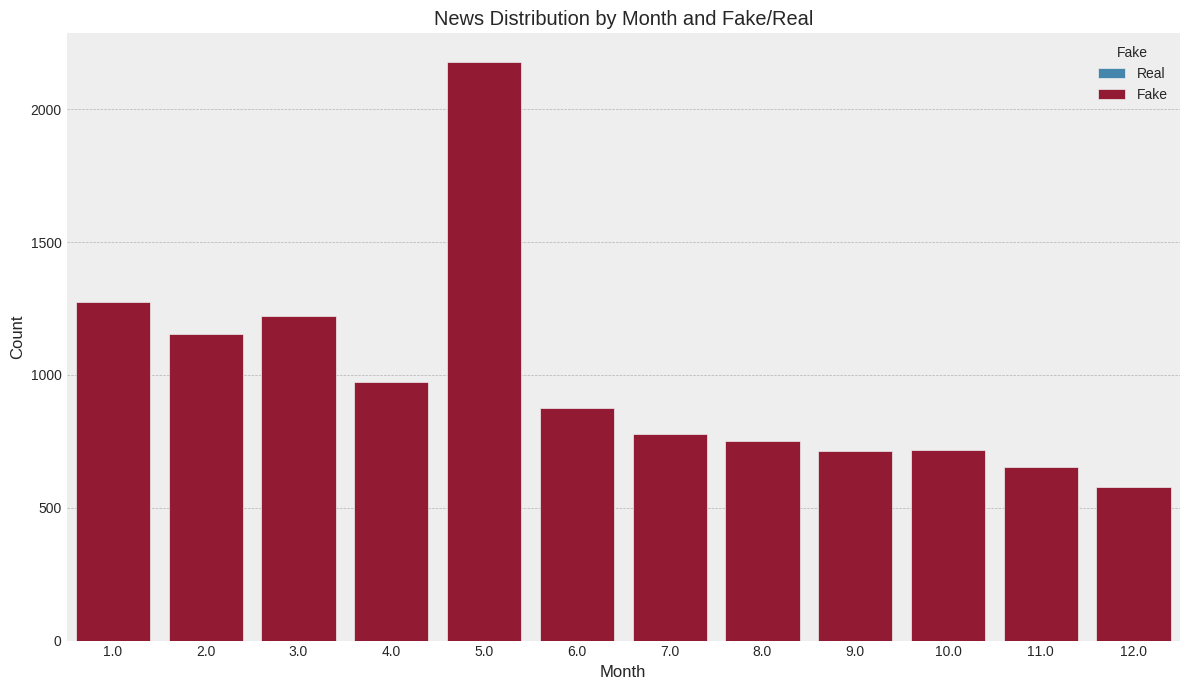

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('bmh')
plt.figure(figsize=(12, 7))
sns.countplot(data=df.reset_index(), x='Month', hue='Fake')
plt.title('News Distribution by Month and Fake/Real')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Fake', labels=['Real', 'Fake'])
plt.tight_layout()
plt.show()

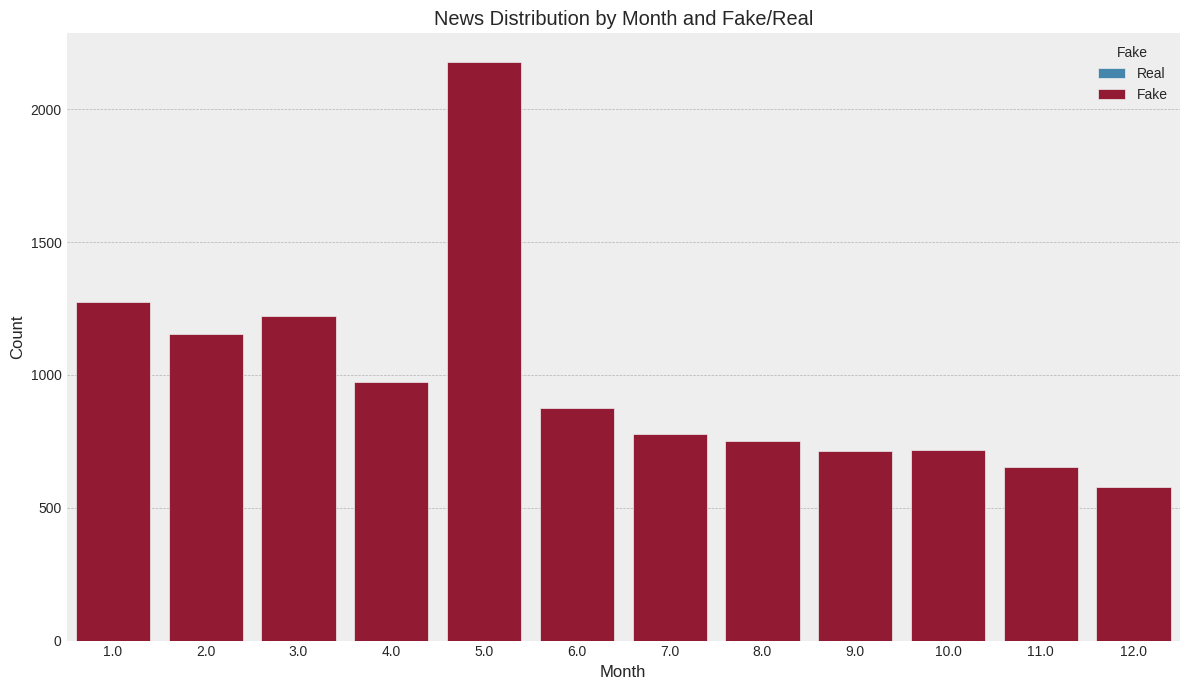

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.figure(figsize=(12, 7))
df = df.reset_index(drop=True)
sns.countplot(data=df, x='Month', hue='Fake')
plt.title('News Distribution by Month and Fake/Real')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Fake', labels=['Real', 'Fake'])
plt.tight_layout()
plt.show()

In [59]:
df.subject.value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='Year', ylabel='count'>

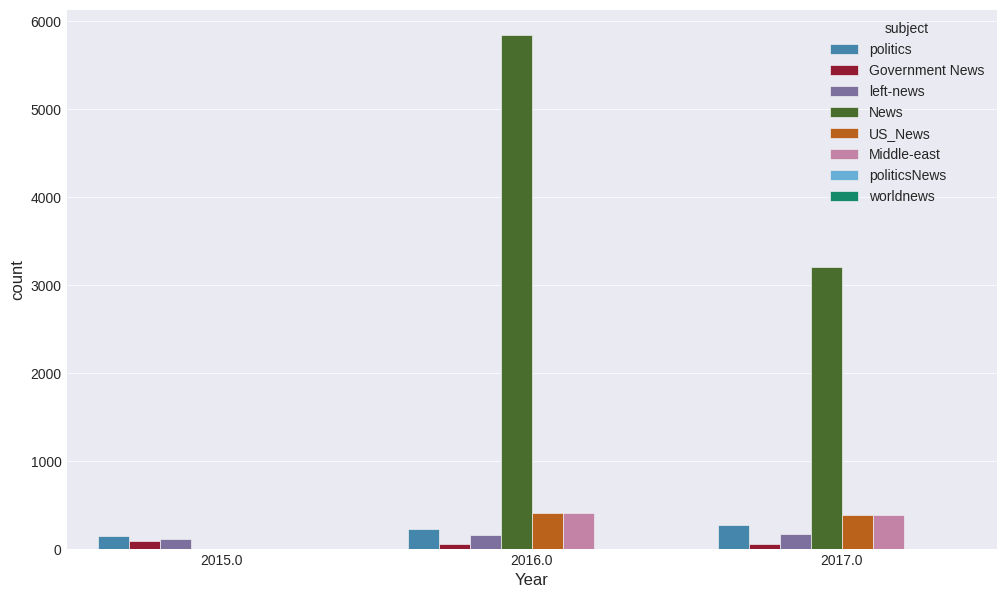

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Year', hue='subject')

In [35]:
nlp.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [61]:
df['full_text'] = df['title'] + ' ' + df['subject']

In [66]:
df.head()

,title,text,subject,date,Fake,Year,Month,full_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0,Pope Francis Just Called Out Donald Trump Dur...


In [67]:
y = df['Fake']
X = df.drop('Fake', axis=1)

In [68]:
def stemming_process(y):
    first_step = re.sub(r"^[A-Za-z]", ' ', y).lower()
    second_step = first_step.split()
    porter_stemmer = PorterStemmer()
    result = []
    for w in second_step:
        if w not in stopwords.words('english'):
            result.append(porter_stemmer.stem(w))
    return ' '.join(result)

In [69]:
df['full_text'] = df['full_text'].apply(stemming_process)

In [70]:
X = df['full_text'].to_numpy()
y = df['Fake'].to_numpy()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [74]:
prediction = lg.predict(X_test)

In [75]:
accuracy = accuracy_score(prediction, y_test)
print(f"Model precision: {accuracy}")

Model precision: 0.9998218262806237


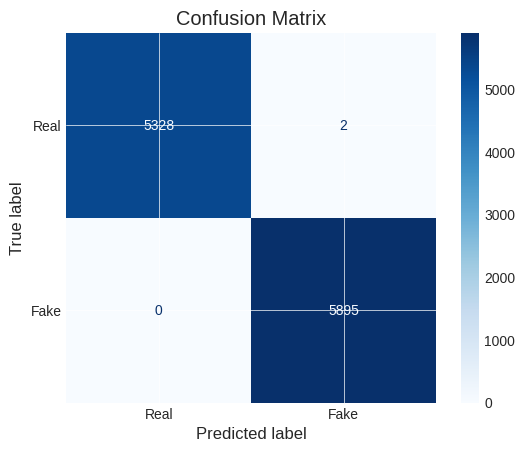

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()